# PREPROCESSING

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
% matplotlib inline

## LOAD DATA

The follow features were dropped to prevent overfitting: CountyName, State, and Date.

In [2]:
df = pd.read_csv('data/wheat-2013-supervised.csv')
drop_cols = ['CountyName','State','Date']
df.drop(drop_cols,axis=1,inplace=True)
df.head()

,Latitude,Longitude,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,precipIntensity,precipIntensityMax,precipProbability,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,46.811686,-118.695237,35.70,20.85,0.00,29.53,0.91,0.0000,0.0000,0.00,...,0,1027.13,35.70,27.48,2.46,214,1.18,134.110657,0,35.7
1,46.929839,-118.352109,35.10,26.92,0.00,29.77,0.93,0.0001,0.0019,0.05,...,0,1026.87,35.10,26.92,2.83,166,1.01,131.506592,0,35.7
2,47.006888,-118.510160,33.38,26.95,0.00,29.36,0.94,0.0001,0.0022,0.06,...,0,1026.88,33.38,26.95,2.95,158,1.03,131.472946,0,35.7
3,47.162342,-118.699677,28.05,25.93,0.91,29.47,0.94,0.0002,0.0039,0.15,...,0,1026.37,33.19,27.17,2.89,153,1.84,131.288300,0,35.7
4,47.157512,-118.434056,28.83,25.98,0.91,29.86,0.94,0.0003,0.0055,0.24,...,0,1026.19,33.85,27.07,2.97,156,1.85,131.288300,0,35.7


## DATA SIZE CHECK

I check for data length to double check if I should run on my local computer or AWS.

In [3]:
df.shape

(177493, 23)

## NULL CHECK

This is important to note for the preprocessing stage, where I will impute a value (such as average) for missing data.

The following features have missing data: precipIntensity, precipIntensityMax, precipProbability, pressure, visibility

In [4]:
df.isnull().sum()

Latitude                    0
Longitude                   0
apparentTemperatureMax      0
apparentTemperatureMin      0
cloudCover                  0
dewPoint                    0
humidity                    0
precipIntensity             1
precipIntensityMax          1
precipProbability           1
precipAccumulation          0
precipTypeIsRain            0
precipTypeIsSnow            0
precipTypeIsOther           0
pressure                  254
temperatureMax              0
temperatureMin              0
visibility                 30
windBearing                 0
windSpeed                   0
NDVI                        0
DayInSeason                 0
Yield                       0
dtype: int64

## FEATURE VARIANCE CHECK

I check for zero variance features (i.e. features with just one value). The following feature(s) have zero variance: precipTypeIsOther

In [5]:
for col in df.columns[5:]:
    if df[col].var() == 0:
        print '*****LOW VARIANCE WARNING***** ==> {} ==> var:{}'.format(col,df[col].var())
    else:
        print '{} ==> var:{}'.format(col,df[col].var())

dewPoint ==> var:278.479665344
humidity ==> var:0.026761541123
precipIntensity ==> var:2.07884441849e-05
precipIntensityMax ==> var:0.00200543474883
precipProbability ==> var:0.064219439784
precipAccumulation ==> var:0.131102111636
precipTypeIsRain ==> var:0.166287619868
precipTypeIsSnow ==> var:0.0822035304839
*****LOW VARIANCE WARNING***** ==> precipTypeIsOther ==> var:0.0
pressure ==> var:74.0873495915
temperatureMax ==> var:430.781354338
temperatureMin ==> var:316.90117822
visibility ==> var:1.64280922978
windBearing ==> var:10837.5596277
windSpeed ==> var:22.7315132832
NDVI ==> var:102.622306243
DayInSeason ==> var:2873.90002706
Yield ==> var:231.469040495


## REMOVE USELESS FEATURE(S)

As you can see below, all values for "precipTypeIsOther" is all zero; thus making it a useless feature. So I removed the feature.

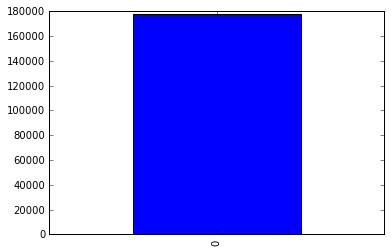

In [6]:
df.precipTypeIsOther.value_counts().plot(kind='bar')
df.drop('precipTypeIsOther',axis=1,inplace=True)

## IMPUTATION | DROP NULL ROWS

I'm typically frugal with my data and try not to throw anything out (i.e. I would impute averages or other extrapolated values that are appropriate). However, the ratio of NaNs to data points is so small enough for me to drop any NaNs/null values.

In [7]:
df.dropna(inplace=True)

## SAVE DATA TO CSV

In [8]:
df.to_csv('data/wheat-2013-supervised-edited.csv')